In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# Use only the subjects with all 3 modalities

In [2]:
vol_subjects = pd.read_csv('vol_subjects.csv')
con_subjects = pd.read_csv('con_subjects.csv')
dif_subjects = pd.read_csv('dif_subjects.csv')

In [3]:
subjects_list = vol_subjects.merge(con_subjects, how='inner', on='subject_key')
subjects_list = subjects_list.merge(dif_subjects, how='inner', on='subject_key')
# subjects_list.to_csv('3_modalities_subjects.csv', index=False)
subjects_list

,subject_key
0,23517001
1,23517002
2,23517003
3,23517004
4,23517005
...,...
181,23517585
182,23517586
183,23517587
184,23517588


# Preprocessing

In [4]:
df = pd.read_csv("session_one_cerebellar_volumes_divided_by_icv.csv", index_col=0)

In [5]:
y = df.bipolar
y2 = y.copy()
X = df.drop(['bipolar', 'session', 'scan_date', 'age_months_at_scan_date'], axis=1)
X['female'] = 0
pd.options.mode.chained_assignment = None #turn warnings off
for i in range(0, len(X.index)):
    if X.sex.iloc[i]=='F':
        X.female.iloc[i] = 1
X = X.drop('sex', axis=1)
cols = X.columns.tolist()
cols = cols[-1:] + cols[:-1]
X = X[cols]

In [6]:
X = X.merge(subjects_list, how='inner', on='subject_key')
# X.set_index('subject_key', inplace=True)
df2 = X.merge(y, on='subject_key', how='inner')

In [7]:
df2

,subject_key,female,age_years_at_scan_date,ctx_rh_PIns_posterior_insula,ctx_lh_PIns_posterior_insula,ctx_rh_PO_parietal_operculum,ctx_lh_PO_parietal_operculum,Left_Lateral_Ventricle,Left_Inf_Lat_Vent,ctx_rh_POrG_posterior_orbital_gyrus,...,ctx_lh_OFuG_occipital_fusiform_gyrus,ctx_rh_OpIFG_opercular_part_of_the_inferior_frontal_gyrus,Left_OpIFG_opercular_part_of_the_inferior_frontal_gyrus,ctx_rh_OrIFG_orbital_part_of_the_inferior_frontal_gyrus,Left_OrIFG_orbital_part_of_the_inferior_frontal_gyrus,X4th_Ventricle,X3rd_Ventricle,cerebellar_icv,icv,bipolar
0,23517001,1,29.08,0.001333,0.001478,0.001479,0.001621,0.000143,0.000022,0.001782,...,0.002854,0.002554,0.002260,0.000743,0.000835,0.000000,0.000000e+00,0.094563,1280918,1
1,23517002,1,52.50,0.001449,0.001461,0.001542,0.001624,0.000151,0.000015,0.001763,...,0.003011,0.002252,0.002179,0.000903,0.000714,0.000005,0.000000e+00,0.099775,1434300,1
2,23517003,1,51.63,0.001637,0.001491,0.001893,0.001818,0.000159,0.000011,0.001914,...,0.002496,0.002116,0.001763,0.000790,0.000924,0.000006,0.000000e+00,0.091648,1543634,1
3,23517004,1,57.12,0.001394,0.001446,0.001804,0.001039,0.000131,0.000004,0.002173,...,0.003017,0.003115,0.002220,0.000803,0.000843,0.000004,7.026054e-07,0.084481,1423274,1
4,23517005,1,41.46,0.001434,0.001304,0.001421,0.001461,0.000127,0.000016,0.002036,...,0.002844,0.002668,0.002454,0.000774,0.000816,0.000004,0.000000e+00,0.088481,1361618,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,23517585,1,61.39,0.001450,0.001484,0.001329,0.001824,0.000144,0.000022,0.001834,...,0.002414,0.003362,0.002184,0.000597,0.000559,0.000005,0.000000e+00,0.093988,1256893,0
182,23517586,1,62.77,0.001873,0.001478,0.002196,0.001733,0.000117,0.000018,0.002231,...,0.002486,0.002769,0.002721,0.000567,0.001008,0.000009,0.000000e+00,0.097613,1424169,0
183,23517587,1,37.15,0.001706,0.001544,0.001530,0.001810,0.000136,0.000013,0.002365,...,0.002731,0.002998,0.002413,0.000979,0.001390,0.000000,0.000000e+00,0.107090,1181280,0
184,23517588,1,58.97,0.001506,0.001399,0.001508,0.001519,0.000130,0.000019,0.001998,...,0.002783,0.002572,0.001267,0.000621,0.000826,0.000004,7.759619e-07,0.099751,1288723,0


In [8]:
# Use the same test cases as I did in the original volumetric analysis.
test_subject_ids = [23517046, 23517029, 23517034, 23517519, 23517107, 23517121,
       23517145, 23517092, 23517011, 23517026, 23517515, 23517550,
       23517585, 23517081, 23517014, 23517579, 23517507, 23517105,
       23517564, 23517009, 23517147, 23517077, 23517083, 23517546,
       23517533, 23517577, 23517541, 23517089, 23517509, 23517133,
       23517547, 23517588, 23517567, 23517125, 23517587, 23517119,
       23517086, 23517088, 23517099, 23517571, 23517124, 23517058,
       23517015] # These are the test subject ids in volumetric1.

In [9]:
df3 = df2.copy()
df3['test'] = 0
for i in range(len(df3)):
    if df3.subject_key[i] in test_subject_ids:
        df3.loc[i, 'test'] = 1
# Final test subject ids:
final_test_subjects = df3.loc[df3.test==1, 'subject_key']
final_test_subjects

8      23517009
9      23517011
11     23517014
12     23517015
22     23517026
24     23517029
27     23517034
36     23517046
48     23517058
62     23517081
64     23517086
66     23517088
68     23517092
73     23517099
78     23517105
80     23517107
90     23517119
93     23517124
94     23517125
104    23517145
106    23517147
114    23517507
116    23517509
121    23517515
124    23517519
136    23517533
141    23517541
146    23517546
147    23517547
150    23517550
163    23517564
165    23517567
169    23517571
175    23517577
177    23517579
181    23517585
183    23517587
184    23517588
Name: subject_key, dtype: int64

In [10]:
# Split the data into training and test sets
df_train = df3.loc[df3.test==0, :]
df_test = df3.loc[df3.test==1, :]
X_train = df_train.drop(['bipolar', 'subject_key', 'test'], axis=1)
X_test = df_test.drop(['bipolar', 'subject_key', 'test'], axis=1)
y_train = df_train['bipolar']
y_test = df_test['bipolar']

X_train.shape, X_test.shape, len(y_train), len(y_test)

((148, 212), (38, 212), 148, 38)

In [11]:
y_train.mean(), y_test.mean() #proportion of bipolar in training and test sets

(0.5878378378378378, 0.5526315789473685)

In [15]:
# Split training data into initial training and validation sets
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

y_train.mean(), y_train2.mean(), y_val.mean(), y_test.mean() #proportion of bipolar in training, validation, and test sets

(0.5878378378378378, 0.5847457627118644, 0.6, 0.5526315789473685)

In [16]:
# Normalize the training, initial training, validation, and test sets:
from sklearn.preprocessing import MinMaxScaler
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train2 = np.array(X_train2)
X_val = np.array(X_val)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
X_train2 = scaler.transform(X_train2.reshape(-1, X_train2.shape[-1])).reshape(X_train2.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

X_train2.shape, X_val.shape, X_test.shape, len(y_train), len(y_val), len(y_test)

((118, 212), (30, 212), (38, 212), 148, 30, 38)

In [17]:
X_train.shape, X_test.shape #rows, columns

((148, 212), (38, 212))

In [18]:
len(y_train), len(y_test)

(148, 38)

In [20]:
y_train = y_train.reset_index().bipolar
df_train = df_train.reset_index()

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=6)
kf.split(X_train, y=y_train)
X_cv_train = {}
X_cv_test = {}
y_cv_train = {}
y_cv_test = {}
test_subjects = {}
test_indices = {}
for i, (train_index, test_index) in enumerate(kf.split(X_train, y=y_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    X_cv_train[i] = X_train[train_index, :]
    y_cv_train[i] = y_train[train_index]
    X_cv_test[i] = X_train[test_index, :]
    y_cv_test[i] = y_train[test_index]
    test_subjects[i] = df_train.subject_key[test_index].values
    test_indices[i] = test_index

Fold 0:
  Train: index=[  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  40  41  42  43  44  45  46  47  48  49  50  51  52  55  56  57  58
  59  60  62  63  64  65  66  67  68  69  70  71  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  96  97  98  99
 100 101 102 103 104 105 106 107 109 110 111 112 113 114 115 116 117 118
 119 121 123 124 125 126 127 128 129 130 131 132 134 135 136 137 138 139
 140 141 142 143 144 146 147]
  Test:  index=[  2  23  39  53  54  61  72  73  74  95 108 120 122 133 145]
Fold 1:
  Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18  19
  20  21  22  23  24  25  26  27  28  29  31  33  34  35  36  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  53  54  56  57  59  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  84  85  86  87  88  90  91  92  93

# Logistic Regression

In [23]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=1,
                       max_iter=5000, C=1.65, random_state=5).fit(X_train2, y_train2)
lr.score(X_val, y_val)

0.7333333333333333

# K Nearest Neighbors

In [25]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train2, y_train2)
knn.score(X_val, y_val)

0.5666666666666667

# Decision Tree

In [26]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=5, min_samples_split=4, criterion='gini',
                            max_depth=2).fit(X_train2, y_train2)
dt.score(X_val, y_val)

0.5

# Adaboost (boosted decision trees)

In [27]:
# Adaboost / C4.5
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=8, max_depth=1),
                              n_estimators=150, learning_rate=0.1, random_state=0).fit(X_train2, y_train2)
adaboost.score(X_val, y_val)

0.5666666666666667

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=1, min_samples_split=12, min_samples_leaf=6,
                            max_features=None, random_state=5,
                            class_weight='balanced').fit(X_train2, y_train2)
rf.score(X_val, y_val)

0.6333333333333333

# Naive Bayes

In [29]:
# NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train2, y_train2)
gnb.score(X_val, y_val)

0.7333333333333333

In [30]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(class_prior=[0.5,0.5]).fit(X_train2, y_train2)
mnb.score(X_val, y_val)

0.7

In [31]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB().fit(X_train2, y_train2)
cnb.score(X_val, y_val)

0.7

# SVM

In [32]:
# SVM with RBF kernel
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=5).fit(X_train2, y_train2)
svm.score(X_val, y_val)

0.6666666666666666

In [33]:
# SVM with linear kernel
svm = SVC(kernel="linear", C=0.2).fit(X_train2, y_train2)
# svm = SVC(kernel="linear", C=0.2).fit(X_train, y_train) gives 76.7% accuracy
svm.score(X_val, y_val)

0.5666666666666667

In [34]:
# SVM with polynomial kernel
svm = SVC(kernel="poly", C=0.02, degree=3, gamma=0.103).fit(X_train2, y_train2)
# svm = SVC(kernel="poly", C=0.02, degree=3, gamma=0.103).fit(X_train, y_train) gives 76.7% accuracy
svm.score(X_val, y_val)

0.6333333333333333

In [35]:
# SVM with sigmoid kernel
svm = SVC(kernel="sigmoid", C=6).fit(X_train2, y_train2)
svm.score(X_val, y_val)

0.4666666666666667

# Neural networks

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [46]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
y_train2 = np.array(y_train2)

x = torch.from_numpy(X_train)
y = torch.from_numpy(y_train)
x = x.type(torch.FloatTensor)
y = y.type(torch.LongTensor)
xtest = torch.from_numpy(X_test)
ytest = torch.from_numpy(y_test)
xtest = xtest.type(torch.FloatTensor)
ytest = ytest.type(torch.LongTensor)
xval = torch.from_numpy(X_val)
yval = torch.from_numpy(y_val)
xval = xval.type(torch.FloatTensor)
yval = yval.type(torch.LongTensor)
x2 = torch.from_numpy(X_train2)
y2 = torch.from_numpy(y_train2)
x2 = x2.type(torch.FloatTensor)
y2 = y2.type(torch.LongTensor)

In [47]:
xcv = {}
ycv = {}
xcvtest = {}
ycvtest = {}
for i, xcvi in X_cv_train.items():
    xcv[i] = torch.from_numpy(X_cv_train[i]).type(torch.FloatTensor)
    ycv[i] = torch.from_numpy(y_cv_train[i].values).type(torch.LongTensor)
    xcvtest[i] = torch.from_numpy(X_cv_test[i]).type(torch.FloatTensor)
    ycvtest[i] = torch.from_numpy(y_cv_test[i].values).type(torch.LongTensor)
    

## Single layer neural network

In [53]:
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x

In [54]:
# Run next 4 cells together each time.

torch.manual_seed(5) #random seed

net = OurNet(n_feature=212, n_hidden=250, n_output=2) 
print(net)

OurNet(
  (hidden): Linear(in_features=212, out_features=250, bias=True)
  (out): Linear(in_features=250, out_features=2, bias=True)
)


In [55]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.04, momentum=0.5)
loss_func = torch.nn.CrossEntropyLoss()
epochs = 500

train_error = np.zeros(epochs)
validation_error = np.zeros(epochs)
train_misclass = np.zeros(epochs)
validation_misclass = np.zeros(epochs)

for t in range(epochs):
    out = net(x2)
    outnp = out.detach().numpy()
    loss = loss_func(out, y2)
    out_test = net(xval)
    outnp_test = out_test.detach().numpy()
    loss_test = loss_func(out_test, yval)
    train_error[t] = loss.detach().numpy()
    train_misclass[t] = (np.argmax(outnp, axis=1) != y2.numpy()).mean() * 100
    validation_error[t] = loss_test.detach().numpy()
    validation_misclass[t] = (np.argmax(outnp_test, axis=1) != yval.numpy()).mean() * 100
    optimizer.zero_grad()
    loss.backward()   
    optimizer.step()


(0.6218193173408508, 121)

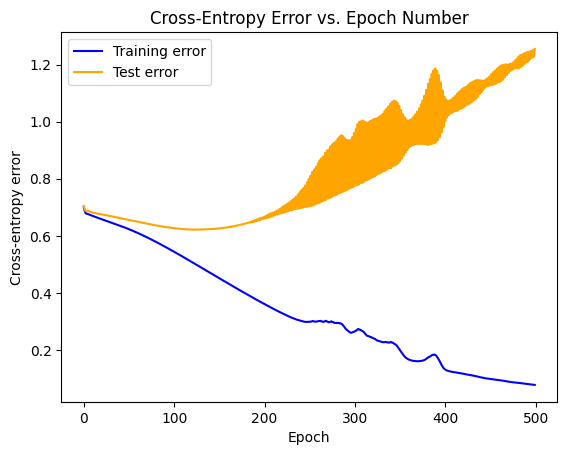

In [56]:
epoch = range(epochs)
plt.plot(epoch, train_error, c='blue')
plt.plot(epoch, validation_error, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy error')
plt.title('Cross-Entropy Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest cross-entropy validation error and number of epochs to achieve:
validation_error.min(), validation_error.argmin() 

(26.666666666666668, 52)

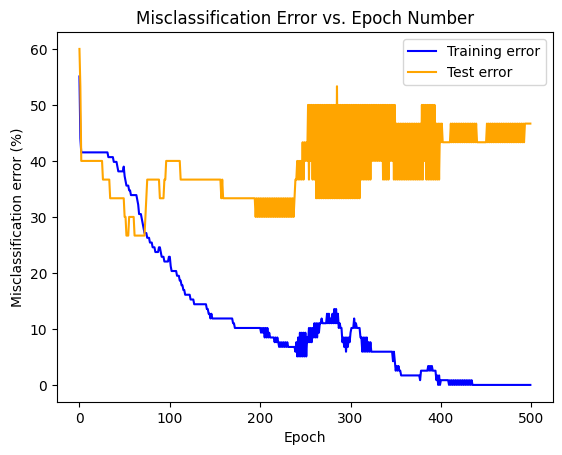

In [57]:
plt.plot(epoch, train_misclass, c='blue')
plt.plot(epoch, validation_misclass, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Misclassification error (%)')
plt.title('Misclassification Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest misclassification percentage and number of epochs to achieve:
validation_misclass.min(), validation_misclass.argmin() 

## Neural network with 2 hidden layers

In [27]:
class Net2(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net2, self).__init__()     
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1) 
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.out = torch.nn.Linear(n_hidden2, n_output)
        
    def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        # x = F.log_softmax(x,dim=1)
        return x

In [28]:
# Run next 4 cells together each time.

torch.manual_seed(1) #random seed

net = Net2(n_feature=212, n_hidden1=250, n_hidden2=250, n_output=2) 
print(net)

Net2(
  (hidden1): Linear(in_features=212, out_features=250, bias=True)
  (hidden2): Linear(in_features=250, out_features=250, bias=True)
  (out): Linear(in_features=250, out_features=2, bias=True)
)


In [29]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.014, momentum=0.97)
# no softmax, random seed 3, lr=0.04, momentum=0.0, relu, n_hidden1=250, n_hidden2=250 gives 18.42% misclass rate after 266 epochs
loss_func = torch.nn.CrossEntropyLoss()
epochs = 139

train_error = np.zeros(epochs)
validation_error = np.zeros(epochs)
train_misclass = np.zeros(epochs)
validation_misclass = np.zeros(epochs)

for t in range(epochs):
    out = net(x)
    outnp = out.detach().numpy()
    loss = loss_func(out, y)
    out_test = net(xtest)
    outnp_test = out_test.detach().numpy()
    loss_test = loss_func(out_test, ytest)
    train_error[t] = loss.detach().numpy()
    train_misclass[t] = (np.argmax(outnp, axis=1) != y.numpy()).mean() * 100
    validation_error[t] = loss_test.detach().numpy()
    validation_misclass[t] = (np.argmax(outnp_test, axis=1) != ytest.numpy()).mean() * 100
    optimizer.zero_grad()
    loss.backward()   
    optimizer.step()


(0.6053966879844666, 87)

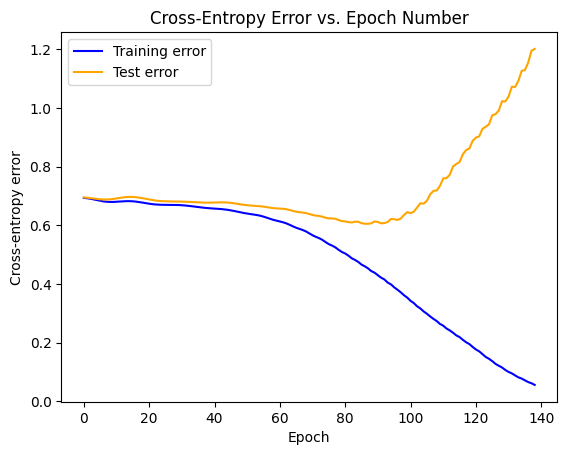

In [30]:
epoch = range(epochs)
plt.plot(epoch, train_error, c='blue')
plt.plot(epoch, validation_error, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy error')
plt.title('Cross-Entropy Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest cross-entropy test error and number of epochs to achieve:
validation_error.min(), validation_error.argmin()

(23.684210526315788, 137)

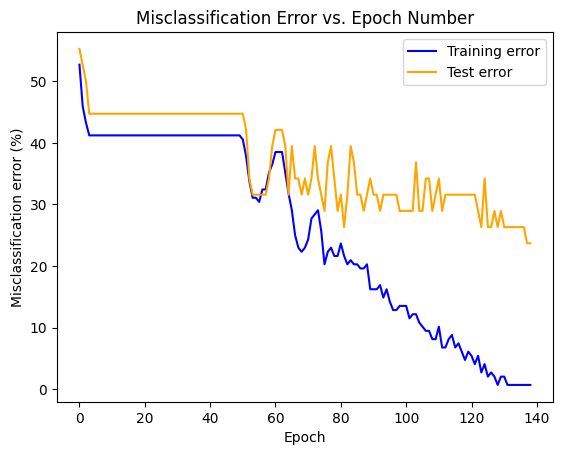

In [31]:
plt.plot(epoch, train_misclass, c='blue')
plt.plot(epoch, validation_misclass, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Misclassification error (%)')
plt.title('Misclassification Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest misclassification percentage and number of epochs to achieve:
validation_misclass.min(), validation_misclass.argmin()

In [32]:
validation_misclass[-1]

23.684210526315788

In [686]:
# Save output on test set
vol_output = pd.DataFrame(out_test.detach().numpy())
vol_output.index = final_test_subjects
vol_output = vol_output.rename(columns={0:'vol_nn_0', 1:'vol_nn_1'})
# vol_output.to_csv('vol_nn_output.csv')

# Also save the true labels of test set
bipolar_test = pd.DataFrame(y_test, columns=['bipolar'])
bipolar_test.index = final_test_subjects
# bipolar_test.to_csv('bipolar_test.csv')

## Characterizing the neural network

In [192]:
X['subject_key'] = subjects_list
X = X.merge(subjects_list, how='inner', on='subject_key')
# X[X.columns[indices]].to_csv('vol_important.csv')
# df2.loc[:, ['subject_key','bipolar']].to_csv('bipolar.csv', index=False)
# y.to_csv('bipolar.csv')

In [193]:
# X.drop(['female','age years at scan date'], axis=1).to_csv('X_vol.csv', index=False)
X.drop(['female','age years at scan date'], axis=1).shape

(186, 211)

### Shap

In [ ]:
import shap
from shap import DeepExplainer

# select backgroud for shap
explainer1 = DeepExplainer(net, x)
shap_values_train = explainer1.shap_values(x)  
shap_values_test = explainer1.shap_values(xtest)

In [51]:
X.drop(columns='subject_key').columns[np.argsort(np.abs(shap_values_test[0]).mean(0))][-15::][::-1]

Index(['wm_lh_entorhinal', 'wm_rh_parsorbitalis', 'ctx_lh_paracentral',
       'ctx_rh_fusiform', 'wm_rh_posteriorcingulate',
       'ctx_lh_rostralmiddlefrontal', 'wm_rh_temporalpole',
       'ctx_rh_parstriangularis', 'ctx_lh_isthmuscingulate',
       'ctx_lh_OCP_occipital_pole', 'age_years_at_scan_date', 'VenousBlood',
       'Left_choroid_plexus', 'wm_lh_bankssts', 'ctx_lh_superiorfrontal'],
      dtype='object')

In [108]:
indices = np.argsort(np.abs(shap_values_test[0]).mean(0))[-10::][::-1]
np.sort(np.abs(shap_values_test[0]).mean(0))[-10::][::-1]

array([0.39769825, 0.3432989 , 0.30390544, 0.27923694, 0.26379985,
       0.25464765, 0.24776618, 0.24452085, 0.24245035, 0.23995099])

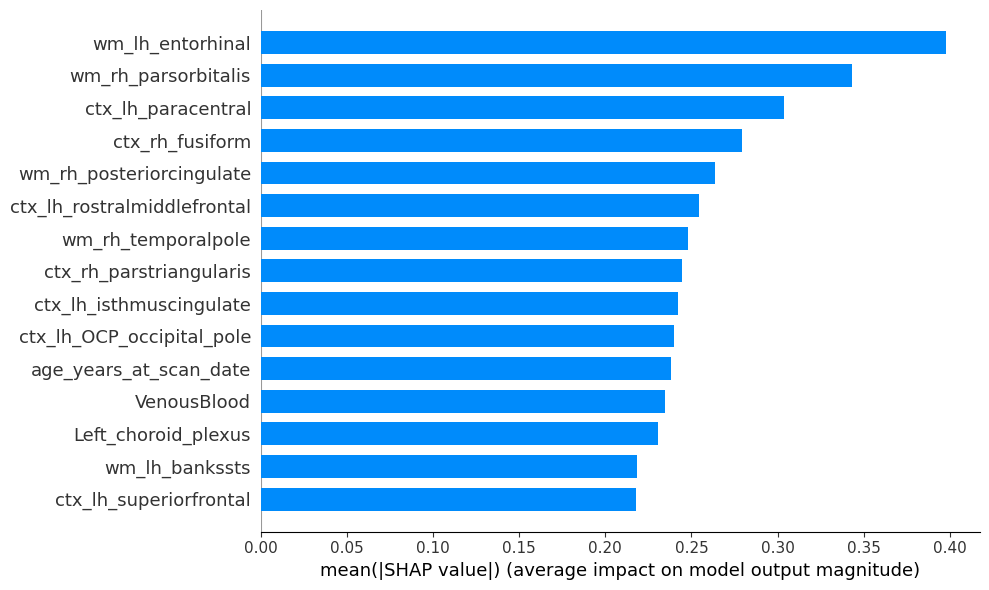

In [43]:
shap.summary_plot(shap_values_test[0], plot_type = 'bar', feature_names = X.drop(columns='subject_key').columns,
                 plot_size=[10,6], max_display=15, show=False)
# plt.savefig('shap_vol.png')

### Try models with only the 10 most important predictors

In [120]:
X_train_small = X_train[:, indices]
X_test_small = X_test[:, indices]
xs = torch.from_numpy(X_train_small)
xs = xs.type(torch.FloatTensor)
xstest = torch.from_numpy(X_test_small)
xstest = xstest.type(torch.FloatTensor)

(28.947368421052634, 54)

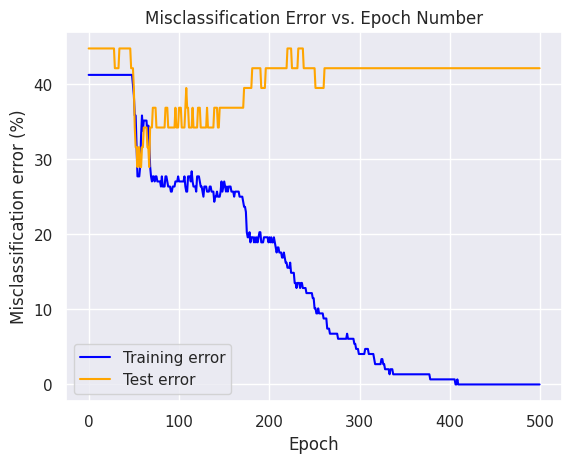

In [106]:
torch.manual_seed(1) #random seed

net = Net2(n_feature=X_train_small.shape[1], n_hidden1=250, n_hidden2=250, n_output=2) 

optimizer = torch.optim.SGD(net.parameters(), lr=0.014, momentum=0.97)
loss_func = torch.nn.CrossEntropyLoss()
epochs = 500

train_error = np.zeros(epochs)
validation_error = np.zeros(epochs)
train_misclass = np.zeros(epochs)
validation_misclass = np.zeros(epochs)

for t in range(epochs):
    out = net(xs)
    outnp = out.detach().numpy()
    loss = loss_func(out, y)
    out_test = net(xstest)
    outnp_test = out_test.detach().numpy()
    loss_test = loss_func(out_test, ytest)
    train_error[t] = loss.detach().numpy()
    train_misclass[t] = (np.argmax(outnp, axis=1) != y.numpy()).mean() * 100
    validation_error[t] = loss_test.detach().numpy()
    validation_misclass[t] = (np.argmax(outnp_test, axis=1) != ytest.numpy()).mean() * 100
    optimizer.zero_grad()
    loss.backward()   
    optimizer.step()

epoch = range(epochs)
plt.plot(epoch, train_misclass, c='blue')
plt.plot(epoch, validation_misclass, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Misclassification error (%)')
plt.title('Misclassification Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest misclassification percentage and number of epochs to achieve:
validation_misclass.min(), validation_misclass.argmin()

### Visualize the important predictors in the neural network

In [189]:
X.drop(columns='subject_key', inplace=True)

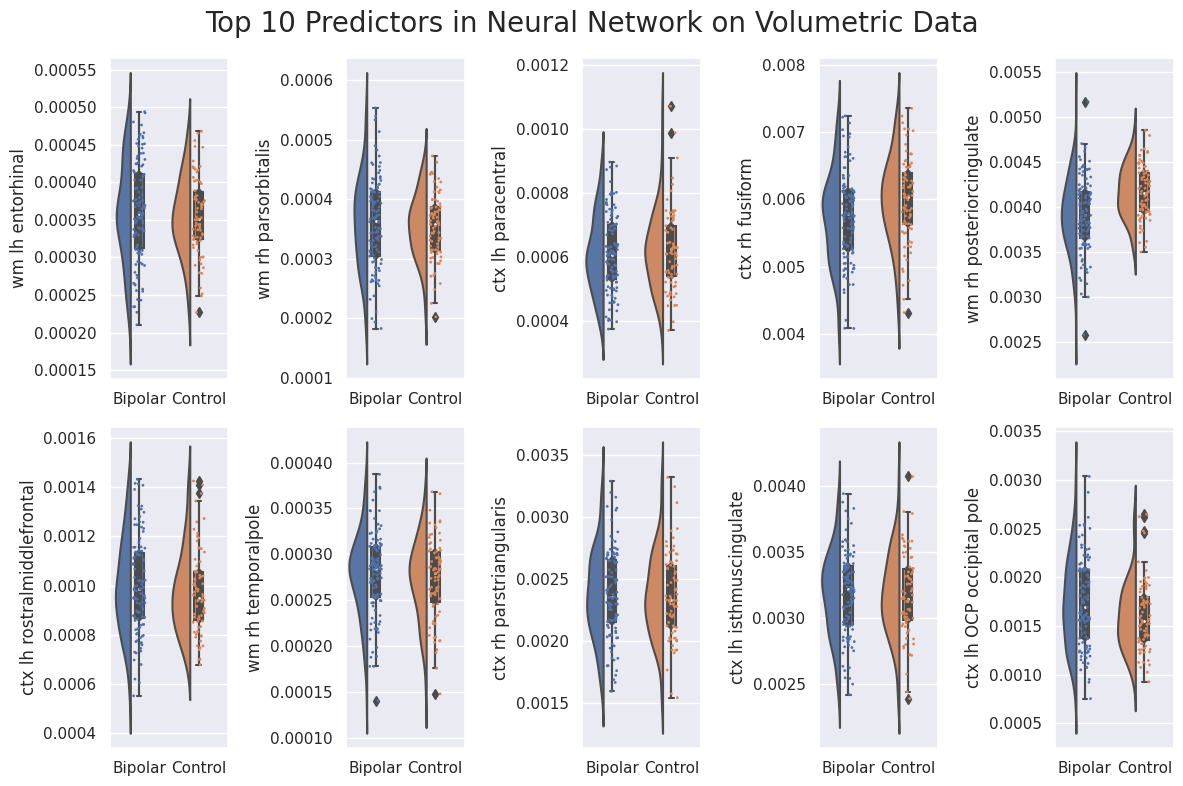

In [110]:
import math
import ptitprince as pt
import seaborn as sns

y2 = df2.bipolar.copy()
y3 = y2.replace({0: 'Control', 1: 'Bipolar'})
y3.name = ''

names = list(X.columns)
i = 0
for name in names:
    name = name.replace('_', ' ')
    names[i] = name
    i += 1
# names[indices[13]] = 'ctx lh SMC\nsupplementary motor cortex' # deal with a really long name
X.columns = names

sns.set(style="darkgrid", font_scale=1)
fig, axes = plt.subplots(2, 5, sharey=False, figsize=(12,8))
j = 0
k = 0
for i in range(0, 10):
    j = math.floor(i/5)
    k = i - math.floor(i/5) * 5
    pt.half_violinplot(x=y3, y=X.columns[indices[i]], data=X.iloc[:,indices], ax=axes[j, k], width=.6)
    sns.stripplot(x=y3, y=X.columns[indices[i]], data=X.iloc[:,indices], ax=axes[j, k], s=2)
    sns.boxplot(x=y3, y=X.columns[indices[i]], data=X.iloc[:,indices], ax=axes[j, k], width = .15)

fig.suptitle('Top 10 Predictors in Neural Network on Volumetric Data', fontsize=20)
fig.tight_layout()
plt.show()

### Metrics

In [684]:
predicted = np.argmax(out_test.detach().numpy(), axis=1)
actual = ytest.numpy()
predicted, actual

(array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [685]:
results = np.empty(len(predicted)).tolist()
for i in range(0, len(predicted)):
    if predicted[i]==1 and actual[i]==1:
        results[i] = 'tp'
    if predicted[i]==0 and actual[i]==1:
        results[i] = 'fn'
    if predicted[i]==1 and actual[i]==0:
        results[i] = 'fp'
    if predicted[i]==0 and actual[i]==0:
        results[i] = 'tn'
np.array(results)

array(['tp', 'tp', 'tp', 'fn', 'tp', 'tp', 'tp', 'fn', 'tp', 'tp', 'tp',
       'tp', 'tp', 'fn', 'tp', 'tp', 'fn', 'fn', 'tp', 'tp', 'tp', 'tn',
       'tn', 'tn', 'tn', 'tn', 'fp', 'tn', 'tn', 'fp', 'tn', 'fp', 'tn',
       'tn', 'fp', 'tn', 'tn', 'tn'], dtype='<U2')

In [687]:
tp = results.count('tp')
fp = results.count('fp')
tn = results.count('tn')
fn = results.count('fn')
print('Sensitivity: ' + str(tp/(tp+fn)))
print('Specificity: ' + str(tn/(tn+fp)))
print('PPV: ' + str(tp/(tp+fp)))
print('NPV: ' + str(tn/(tn+fn)))

Sensitivity: 0.7619047619047619
Specificity: 0.7647058823529411
PPV: 0.8
NPV: 0.7222222222222222


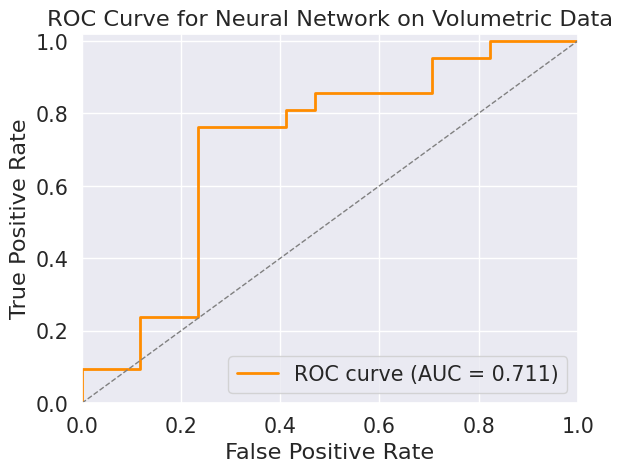

In [688]:
from dython.model_utils import metric_graph
import seaborn as sns

nn1v0 = out_test.detach().numpy()[:,1] - out_test.detach().numpy()[:,0] # score for class 1 minus score for class 0

sns.set(style="darkgrid", font_scale=1.35)
metric_graph(actual, nn1v0, metric='roc', fmt='.3f', title='ROC Curve for Neural Network on Volumetric Data',
             legend='lower right', eopt=False)
plt.show()

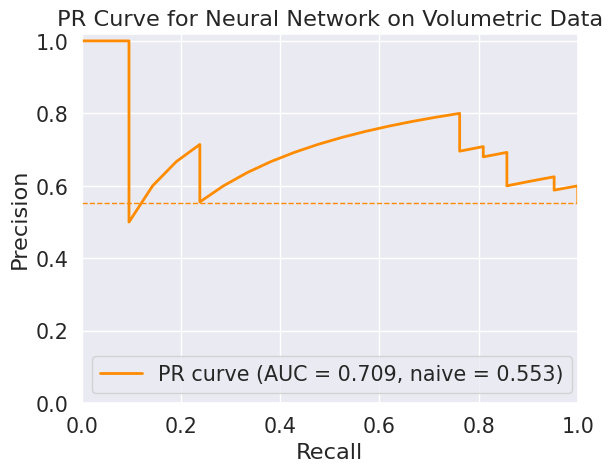

In [689]:
metric_graph(actual, nn1v0, metric='pr', fmt='.3f', title='PR Curve for Neural Network on Volumetric Data',
             legend='lower left', eopt=False) # naive precision/AUC is proportion of bipolar in data.
# precision=PPV, recall=sensitivity
plt.show()

In [690]:
p = metric_graph(actual, nn1v0, metric='pr', plot=False)['0']['eopt']['y']
r = metric_graph(actual, nn1v0, metric='pr', plot=False)['0']['eopt']['x']
F1 = 2*p*r/(p+r)
F1 # F1 score (harmonic mean of precision and recall):

0.7804878048780488

## Cross-validation on training set

In [653]:
cv_errors = np.ones(10)
vol_output_master = pd.DataFrame()
bipolar_cv_master = pd.DataFrame()
for i in range(0, 10):
    torch.manual_seed(1) #random seed
    net = Net2(n_feature=212, n_hidden1=250, n_hidden2=250, n_output=2) 
    optimizer = torch.optim.SGD(net.parameters(), lr=0.014, momentum=0.97)
    loss_func = torch.nn.CrossEntropyLoss()
    epochs = 160

    train_error = np.zeros(epochs)
    validation_error = np.zeros(epochs)
    train_misclass = np.zeros(epochs)
    validation_misclass = np.zeros(epochs)

    for t in range(epochs):
        out = net(xcv[i])
        outnp = out.detach().numpy()
        loss = loss_func(out, ycv[i])
        out_test = net(xcvtest[i])
        outnp_test = out_test.detach().numpy()
        loss_test = loss_func(out_test, ycvtest[i])
        train_error[t] = loss.detach().numpy()
        train_misclass[t] = (np.argmax(outnp, axis=1) != ycv[i].numpy()).mean() * 100
        validation_error[t] = loss_test.detach().numpy()
        validation_misclass[t] = (np.argmax(outnp_test, axis=1) != ycvtest[i].numpy()).mean() * 100
        optimizer.zero_grad()
        loss.backward()   
        optimizer.step()
    cv_errors[i] = validation_misclass.min()
    
    # Save output on test set
    vol_output = pd.DataFrame(out_test.detach().numpy())
    vol_output.index = test_subjects[i]
    vol_output = vol_output.rename(columns={0:'vol_nn_0', 1:'vol_nn_1'})
    #vol_output.to_csv('vol_nn_cv'+str(i)+'.csv')
    vol_output_master = pd.concat([vol_output_master, vol_output])
    
    # Also save the true labels of test set
    bipolar_cv = pd.DataFrame(y_train[test_indices[i]], columns=['bipolar'])
    bipolar_cv.index = test_subjects[i]
    #bipolar_cv.to_csv('bipolar_cv'+str(i)+'.csv')
    bipolar_cv_master = pd.concat([bipolar_cv_master, bipolar_cv])
    bipolar_cv_master.to_csv('bipolar_cv.csv')

In [654]:
cv_errors, cv_errors.mean()

(array([26.66666667, 33.33333333, 33.33333333, 26.66666667, 33.33333333,
        33.33333333, 20.        , 26.66666667, 21.42857143, 28.57142857]),
 28.333333333333332)

In [629]:
vol_output_master.to_csv('vol_nn_cv.csv')